In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


<font  style="font-size: 4rem; color: #1abc9c"> Decision Trees </font>

# <font color="#1E90FF">Exercise 1. simple dataset with 2 features</font>


## <font color="#9400D3">1. Load, analyze and prepare data</font>

A machine learning task always begins by analyzing data. The first mandatory step is to look at your data.

<font color="red">**Question 1:**</font> You should always be able to say:
- How many examples $\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...\boldsymbol{x}^{(n)}$ in the dataset?
- How many features $x_1, x_2,...x_d$ ? What are their types? Their distribution?
- What are the classes?
- What is the class distribution over the dataset?


In [35]:
# We will load the data that is in the file 'NonLinear.txt'
df = pd.read_csv('./data/NonLinear.txt', sep = ' ')
df

,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


### Train / Valid / Test split

<font color="red">**Question 2:**</font>
How many samples in the train, validation and test set?

In [36]:
data = df.rename(columns={df.columns[0]: 'X1',df.columns[1]: 'X2',df.columns[2]: 'Y'}) # to be consistent with any other input file

data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 1)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 1)


### Plotting the training set

Visualising the data will help us to better understand its distribution.  
We will plot each class label with different colours. 

<font color="blue">**todo:**</font> You can also vizualise the validation and test set. You can plot all sets in the same plot but each will have a distinct shape.

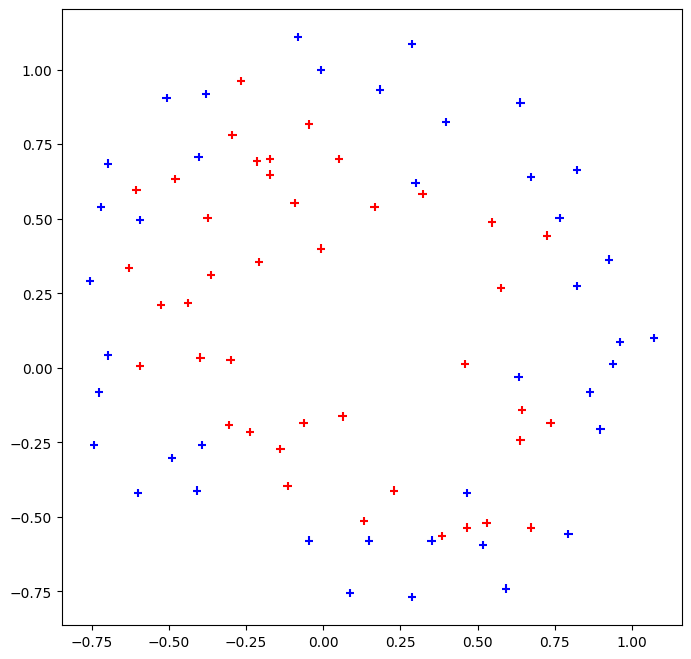

In [37]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.Y, cmap = color_map, marker='+')

In [38]:
# TODO

## <font color="#9400D3">2. Fitting a decision tree</font>

The basic decision tree can be obtained easily using the class <code>DecisionTreeClassifier</code>. More advanced options can be inserted into the 'DecisionTreeClassifier' function.

Remember:  The <code>fit</code> function needs to have 2 parameters (at least) : 
- the set of features describing the examples (here the 2 first columns of our train set)
- the associated labels (classes, here the column 'Y' of our train set)

In [39]:
# instantiate the decision tree model (using most of the default parameters)
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(data_train.iloc[:,:2], data_train.Y)


### Visualizing the obtained tree

The <code>plot_tree</code> function can output two things : 
 - a text version of the tree (where are written the informations about all the nodes of the tree) -> not showed here
 - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

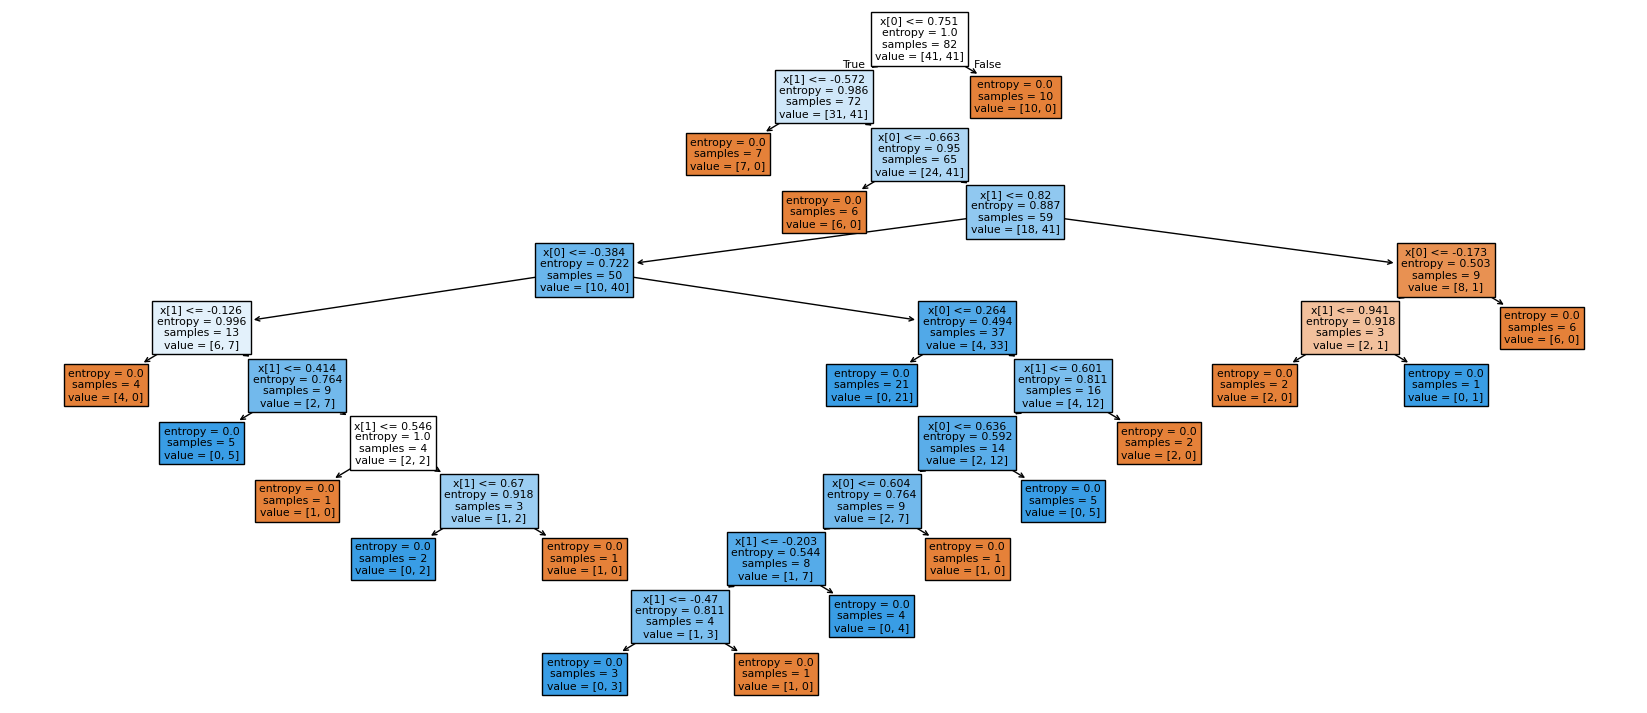

In [40]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)
plt.show()

<font color="red">**Question 3:**</font>
- What does entropy represent?
- Explain the value of the entropy obtained at the root and the leaves of the tree, as well as the evolution of the entropy along the tree.

We can compute the complexity of a tree by counting the number of nodes and leaves.

In [41]:
n_nodes = dt.tree_.node_count
n_leaves=dt.get_n_leaves()
print("Number of nodes={nodes}, leaves={leaves}".format(nodes=n_nodes, leaves=n_leaves))

Number of nodes=35, leaves=18


<font color="red">**Question 4:**</font>
Look at the first data point in the training set (below). Based on the feature values, look at the plotted tree above and determine what class the tree would predict for this data point. Is it the correct class for the data point?  
Do this for 1 or 2 other data points. Does the tree predict the correct class? Is it expected ?
 

In [42]:
data_train.iloc[0] # 1rst example in the training set

X1    0.46601
X2   -0.53582
Y     1.00000
Name: 32, dtype: float64

In [43]:
# We can obtain automatically the prediction of the tree for any example with the 'predict' command:
dt.predict(data_train.iloc[:1,:2]) # here the first example of the train set is predicted

array([1])

### Evaluation

The <code>score(X, y)</code> function (as for logistic regression), compute the accuracy of a model on the given  data and labels.

In [44]:
# data_train.iloc[:,:2] -> all rows, 2 first columns
dt.score(data_train.iloc[:,:2], data_train.Y)


1.0

<font color="red">**Question 5:**</font>

- What is the empirical classification error? Comment.
- What is the real classification error (generalization error)?

You can also compute the confusion matrix.

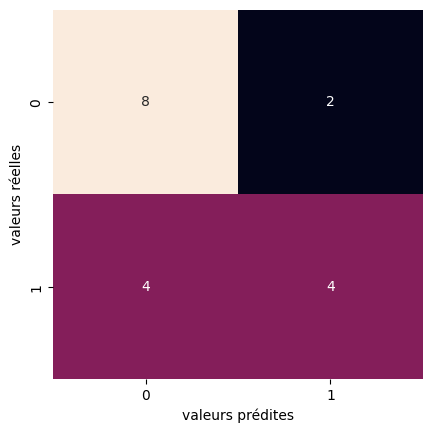

In [45]:
pred_test = dt.predict(data_test.iloc[:,:2])
conf = confusion_matrix(data_test.Y, pred_test)
sns.heatmap(conf, square=True, annot=True, cbar=False, xticklabels=np.unique(data_test.Y), yticklabels=np.unique(data_test.Y))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');


### Decision boundaries

The function <code>draw_boundary_tree</code> plots the decision boundary (only for dataset with 2 features of course).
It takes as parameters : 
 - the model (here a tree)
 - the dataset of examples that you want to plot together with the boundary
 
An example of the use of this function with our data and tree is given right after.

In [46]:
def draw_boundary_tree(model, data):
    h = 0.05
    xx, yy = np.meshgrid(
            np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
            np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max()))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    zz2.columns=['X1','X2'] # avoid warning on valid feature names
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+', s=70)
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

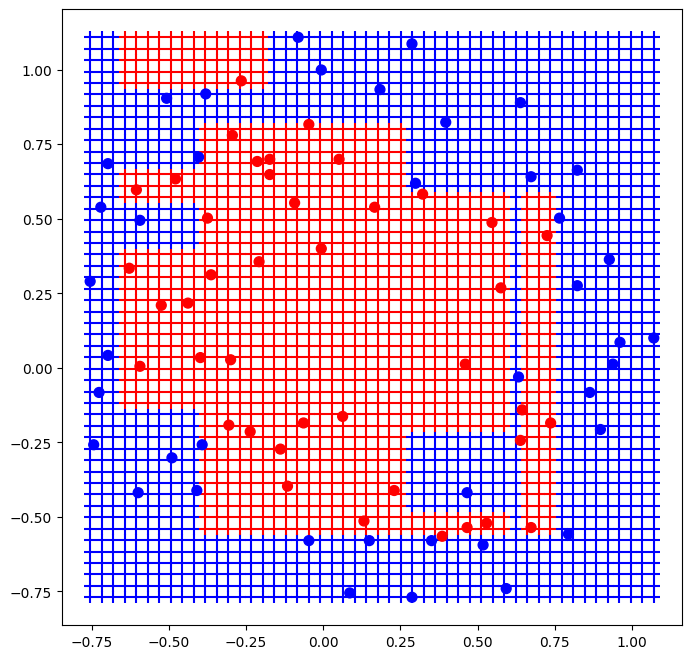

In [47]:
draw_boundary_tree(dt, data_train)

<font color="red">**Question 6:**</font> Why this boundary is typical of a decision tree ? What kind of phenomenon can you observe here ?



## <font color="#9400D3">3. Pruning the tree</font>

The 'basic' decision tree $T_{max}$ is only composed of pure leaves which might lead to an overfitting model. 

There are 2 ways to simplify the model (and thus increase his generalization ability):
- **pre-pruning**: early stop of the tree building. Can be controlled with parameters 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes' or 'min_impurity_decrease'
- **post-pruning** with a validation set.

### Pre-pruning

<font color="blue">**todo:**</font> Build a pruned tree using a early stopping criteria (pick one).
 - Estimate its generalization error
 - Compare this error with the $T_{max}$ tree, as well as the complexity (number of nodes/leaves).

In [48]:
# TODO



### Post-pruning
In the second case, a common algorithm is the **minimal cost-complexity pruning**. This algorithm is parameterized by $\alpha \geq 0$, known as the complexity parameter. A non-terminal node with the smallest value of $\alpha$ is the weakest link and will be pruned.

### Effective alphas of pruned tree

<code>cost_complexity_pruning_path</code> returns the $\alpha$ and the corresponding total leaf impurities at each step of the pruning process. As $\alpha$ increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [49]:
tr = tree.DecisionTreeClassifier(criterion='entropy') # first declare a tree
path = tr.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
print(path)

{'ccp_alphas': array([0.        , 0.01626016, 0.02525433, 0.02761784, 0.03509562,
       0.05728087, 0.06468681, 0.06666949, 0.12345184, 0.13420875]), 'impurities': array([0.        , 0.04878049, 0.14979779, 0.20503346, 0.24012908,
       0.29740995, 0.36209676, 0.49543573, 0.86579125, 1.        ])}


You should see above that, for our training set, different trees can be obtained, from basic tree ($\alpha = 0 \rightarrow$ no pruning, no impurity) to maximum pruning.

The values above correspond to the different values of $\alpha$ that we can use ('ccp_alphas') and the associated average impurity in the leaves ('impurities').

We plot below the level of impurity vs the values of $\alpha$. 

Text(0, 0.5, 'total impurity of leaves')

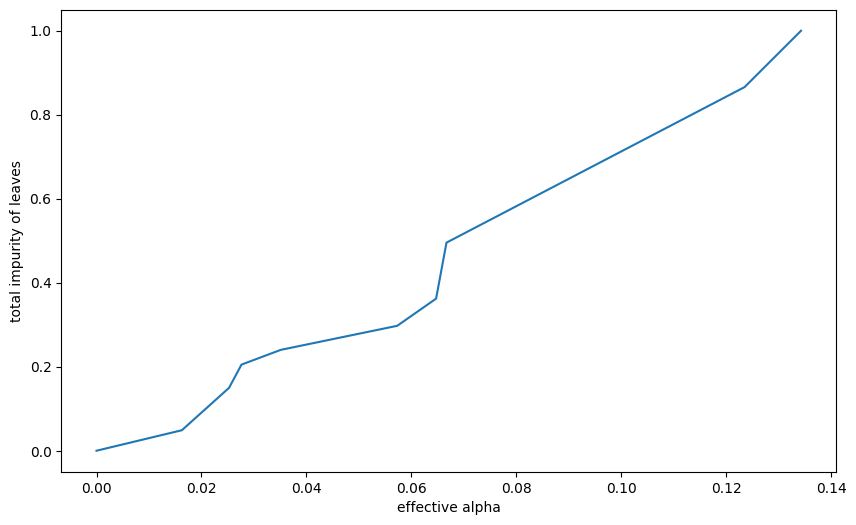

In [50]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

If you want to build a tree with a particular value of $\alpha$, you need to specify it into the 'DecisionTreeClassifier' function (see below).

In [51]:
# Exemple of a pruned tree with the third value from all the possible alphas (the first one is 0, already done with the basic tree)
tr_pruned = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)


<font color="blue">**todo:**</font>

 - Plot the obtained tree to visualize the difference with the one obtained above ($\alpha = 0$). In particular, you should see impure leaves.
 - Visualize the decision boundary of this new tree.
 - Compute its performance on the training set and on the validation set.

In [52]:
# TODO



### Pruned tree selection

<font color="blue">**todo:**</font> Use the validation set to select the best pruned tree :
 - Use a <code>for</code> loop on the values of alpha (<code>path.ccp_alphas</code>) to compute the errors (1-accuracy) of all the possible pruned trees on the training set and on the validation set (you can store the scores in 2 different vectors : 'train_scores' and 'valid_scores').
 - Plot on a graph these errors VS alpha (2 different curves). 


In [53]:
# TO COMPLETE

train_scores, valid_scores = np.zeros(len(path.ccp_alphas)), np.zeros(len(path.ccp_alphas))

#for i in range(len(path.ccp_alphas)):
#...

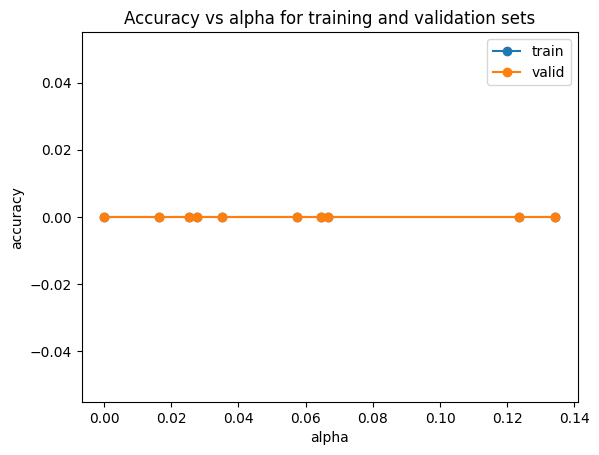

In [54]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(path.ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(path.ccp_alphas, valid_scores, marker="o", label="valid", drawstyle="steps-post")
ax.legend()
plt.show()

<font color="red">**Question 7:**</font>

 - Which pruned tree will you choose here ? What are its number of nodes and leaves ? Draw its decision boundary
 - Estimate its generalization error
 - Compare this error with the $T_{max}$ tree, as well as the complexity (number of nodes/leaves). **Numerical results should be given in a table**. Conclude. 
 
 

In [55]:
# TODO 

### Pre-pruning vs Post-pruning
<font color="red">**Question 8:**</font> Compare results both in term of accuracy and complexity. **Numerical results should be given in a table**.

In [56]:
# TODO 




# <font color="#1abc9c">Exercise 2: with a real dataset of handwritten digits</font>

You will now work with a real dataset containing black and white images of handwritten digits.
Each image has $28 \times 28$ pixels (of value 0 or 1, for white or black) and contains one handwritten digit (from 0 to 9).

The file 'cp_sample.csv' contains 1000 such images (in vectorial form, i.e. only the pixel values and the label).
You see that it contains 1000 rows (1 row -> 1 image) and 785 columns (784 pixel values, and the label)

In [57]:
mnist = pd.read_csv('./data/cp_sample.csv', sep=';')
print(mnist.shape)
mnist.head()

(1000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color="red">**Question 1:**</font>  What is the distribution of the labels in this dataset (i.e., how many images have label 0, label 1, ...) ?
Hint : <code>value_counts()</code>

In [58]:
# TODO


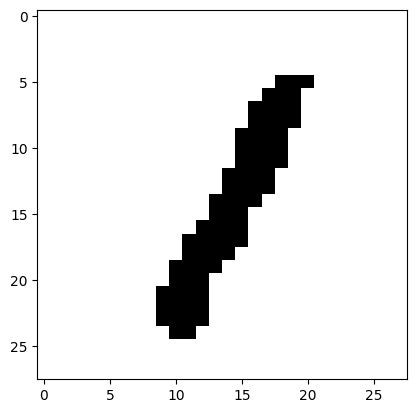

In [59]:
# Note that: mnist.iloc[0,:] is the first image of the dataset
# To get only features without label (1rst column) : mnist.iloc[0,1:]

# It is possible to see an image from its pixel values using the following command:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28),cmap = 'Greys')
# Here is the first image, representing a 1

## <font color="#9400D3">1. Using pixel values as features</font>

<font color="blue">**Todo:**</font>  
- Split this dataset into train / validation / test sets
- Fit a decision tree to the training set (don't try to plot it, it might be huge)
- Check the number of nodes and leaves

<font color="red">**Question 2:**</font> What is the prediction score of this tree on the training set ? on the test set ?

In [60]:
# TODO - split and fit a decision tree


<font color="blue">**Todo:**</font> Compute the post pruning decision trees with cost complexity pruning

<font color="red">**Question 3:**</font>
  - What is the estimation of the generalization error of this tree ?
  - Compare with $T_{max}$

In [61]:
# TODO - cost complexity pruning


## <font color="#9400D3">2. Using HOG representation rather than pixel values</font>

In the previous section, we have directy used the pixel values as features to perform classification. For complex images, the pixel values might not be adapted to this task. Better image representations can be used in order to transform an image into a feature vector that contains informations about then content of an image (colors, orientations for instance). 

We will use a quite simple image representation to perform classification : the HOG representation (some informations can be found here : 
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html).

This representation computes histograms of gradient orientations. Actually, it splits the image into sub-images (blocks) and computes one histogram per block. The number of orientations and blocks are parameters of the HOG representation. 
For instance, with our images ($28\times28$), if we ask for blocks of $14\times14$ pixels and 8 different orientations (angles), it will produce 4 (4 blocks of size  $14\times14$ in the image) histograms of size 8 (8 orientations), hence a vector of size 32.
Each image will now be represented with this vector of size 32 (rather than the 784 pixel values).
Below, an example of how to produce this vector from an image

In [62]:
from skimage.feature import hog

im= mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
# Warning: istic version of skimage -> 'multichannel=True' instead of 'channel_axis=2'
im_hog = hog(im.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1),channel_axis=2)
print(im_hog)

[0.70710678 0.         0.70710678 0.         0.         0.
 0.         0.         0.63453054 0.         0.63453054 0.
 0.44129581 0.         0.         0.         0.59539679 0.
 0.59539679 0.         0.23002187 0.         0.48795006 0.
 0.70710678 0.         0.70710678 0.         0.         0.
 0.         0.        ]


You can see that the result is a vector of size 32 (4 blocks, and histograms with 8 orientations). Each histogram is normalized so that the sum of square values in the histogram equals 1. 

In the following, we will transform each image of our dataset using this representation and then use this new feature as input to classifiers, hoping that it will improve the classification performance.
The next two cells transform the training, validation and test set with the HOG representation (blocks of $14\times 14$ pixels and 8 orientations, you can change these parameters later).

In [63]:
# Warning: istic version of skimage -> 'multichannel=True' instead of 'channel_axis=2'
def compute_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),channel_axis=2)))

In [64]:
hog_train = mnist_train.apply(compute_hog, axis=1, args=(8,14))
hog_valid= mnist_valid.apply(compute_hog, axis=1, args=(8,14))
hog_test = mnist_test.apply(compute_hog, axis=1, args=(8,14))
hog_train['label'] = mnist_train.label
hog_valid['label'] = mnist_valid.label
hog_test['label'] = mnist_test.label

hog_train
# you see here that each image of the training set is now a vector of length 32.
# be careful: label is now the last column

NameError: name 'mnist_train' is not defined

<font color="blue">**Todo:**</font> As previously, find the best tree adapted to this new dataset, and estimate its generalization error.

<font color="red">**Question 4:**</font>
Compare results with those obtained using raw images (i.e. using pixel values as features, previous section). **Numerical results should be presented in a table**.

In [ ]:
## TODO


<font color="blue">**Todo:**</font> Try now to use a richer representation (more blocks -> more features) to improve the generalization error.

<font color="red">**Question 5:**</font> Compare with previous results.

In [ ]:
# TODO - change the representation



In [ ]:
# TODO - find the best tree and compare
